# Overview

This is my First Machine Learning Project
Data Science 
Machine Learning

This Notebook an Attempt for the Kaggle Competition  [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)



## Workflow Stages

1.   Define Problems
2.   Acquire Training and Testing Data
3.   Data Visualization


## Goal

*   It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable
*   What Sorts of People Were More Likely to Srvive the Titanic Sinking





## Metric

Your score is the percentage of passengers you correctly predict. This is known as accuracy

## Submission File Format

# Aquire Data

Mount Google Drive to This Notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Configure Path to kaggle.json

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) API Token"

Change Current Working Directory

In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Titanic - Machine Learning from Disaster/Datasets

/content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Titanic - Machine Learning from Disaster/Datasets


Download Titanic Datasets from Kaggle

In [4]:
!kaggle competitions download -c titanic

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


# Exploratory Data Analysis (EDA)

## Describing Data

Some Non-Relevant Columns Can be Dropped (Prehaps  

In [5]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 Passengers in the Training Dataset, But There is Only 714 Age Data Meaning Imputation for Age is Required to Fill the Missing Values.

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test = pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.shape

(891, 12)

In [10]:
test.shape

(418, 11)

Count the Value of Survived(1) and Deceased(0) Pessengers

In [11]:
survived = train['Survived'].value_counts()
survived

0    549
1    342
Name: Survived, dtype: int64

Count the Value of Male and Female Passengers

In [12]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
sur_sex = pd.crosstab(train['Survived'], train['Sex'])
sur_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


Survive and Decease by Class

In [14]:
sur_cla = pd.crosstab(train['Survived'], train['Pclass'])
sur_cla

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [15]:
train.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## Univariate Analysis

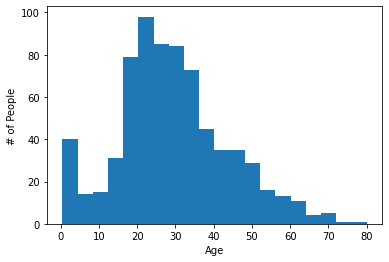

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(train['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('# of People')
plt.show()

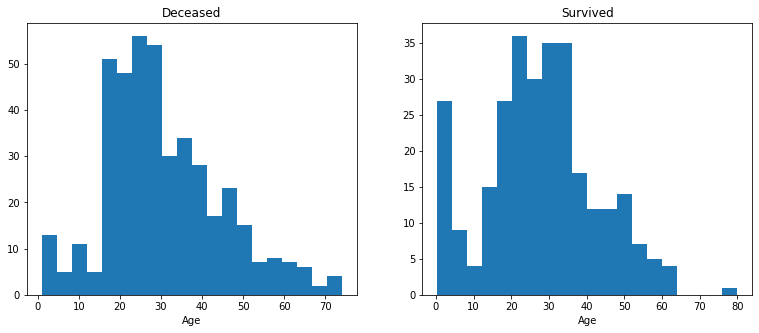

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[0].set_title('Deceased')
ax[1].set_title('Survived')
ax[0].hist(train['Age'].where(train['Survived']==0), bins=20)
ax[1].hist(train['Age'].where(train['Survived']==1), bins=20)
plt.show()

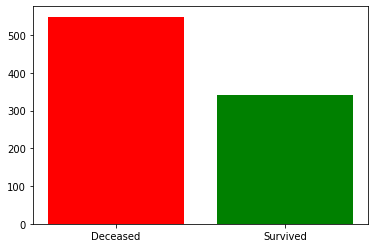

In [18]:
plt.bar(survived.index, survived, color=['r', 'g'], tick_label = ('Deceased', 'Survived'))
plt.show()

Most of the People Have Deceased

## Bivariate Analysis

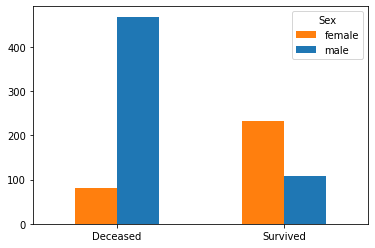

In [19]:
sur_sex.plot(kind='bar', color=['C1', 'C0'], xlabel='').set_xticklabels(['Deceased', 'Survived'], rotation=0)
plt.show()

More Male Than Female Have Deceased

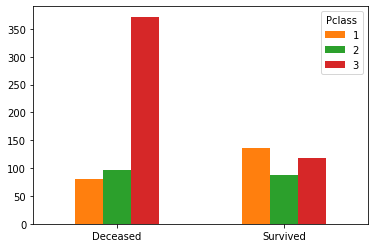

In [20]:
sur_cla.plot(kind='bar', color=['C1', 'C2', 'C3'], xlabel='').set_xticklabels(['Deceased', 'Survived'], rotation=0)
plt.show()

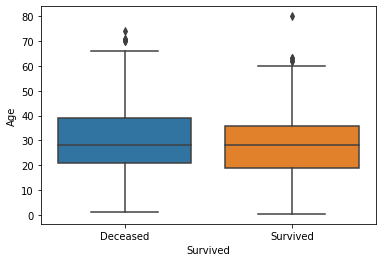

In [21]:
sns.boxplot(x=train['Survived'], y=train['Age']).set(xticklabels=['Deceased', 'Survived'])
plt.show()

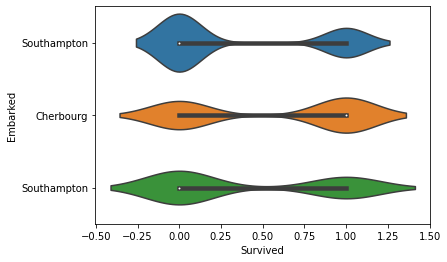

In [22]:
sns.violinplot(x=train['Survived'], y=train['Embarked']).set(yticklabels=['Southampton', 'Cherbourg', 'Southampton'])
plt.show()

## Correlation Analysis

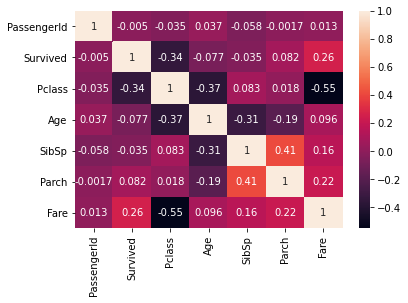

In [23]:
corr_mat = train.corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

# Machine Learning

## Data Preprocessing

The Missing Values Have to Be Estimated Since There are Only 714 and 889 Values for Age and Embarkedm

Drop Indifferent Columns
*   Name (Meaningless to Machine Learning Models)
*   Ticket (Meaningless to Machine Learning Models)
*   Cabin (Too Many Missing Values)



In [67]:
train_drop = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


We Need to Create a Copy of The Data Without the Text Attribute Sex to Impute Age

In [34]:
age = train[['Age']]
age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


Impute Missing Age Values With Mean Since the Data is Well Distributed (Median in Case There're a Lot of Outliers)

In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
age_imputed = pd.DataFrame(imputer.fit_transform(age), columns=age.columns)
age_imputed

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [41]:
imputer.statistics_

array([29.69911765])

Drop the Original Age Column in train_drop and Append the Imputed Age Column

In [68]:
train_drop = train_drop.drop(['Age'], axis=1)
train_drop

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S
887,888,1,1,female,0,0,30.0000,S
888,889,0,3,female,1,2,23.4500,S
889,890,1,1,male,0,0,30.0000,C


In [69]:
train_age_imputed = pd.concat([train_drop, age_imputed], axis=1)
train_age_imputed

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,1,0,3,male,1,0,7.2500,S,22.000000
1,2,1,1,female,1,0,71.2833,C,38.000000
2,3,1,3,female,0,0,7.9250,S,26.000000
3,4,1,1,female,1,0,53.1000,S,35.000000
4,5,0,3,male,0,0,8.0500,S,35.000000
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,27.000000
887,888,1,1,female,0,0,30.0000,S,19.000000
888,889,0,3,female,1,2,23.4500,S,29.699118
889,890,1,1,male,0,0,30.0000,C,26.000000


There Are Also Some Missing Values in The Embarked Column. Therefore, We Fill the Values with The Mode of Embarked

In [76]:
train_age_imputed['Embarked'].fillna(train_age_imputed['Embarked'].mode(), inplace=True)
train_age_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   Age          891 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
